# 01 Exploratory Data Analysis

**Objective:**
Demonstrate data ingestion from Binance and perform basic time-domain analysis (summary statistics and visualizations) on high-frequency tick data for XRP/USDT.

In [1]:
from data_ingestion.fetch_binance_data import fetch_recent_trades, fetch_historical_agg_trades
from preprocessing.resample_ticks import resample_tick_data
from utils.plotting import plot_time_series
from utils.config import DATA_DIR
import pandas as pd
import os

/Users/yechanjeong/Desktop/computational_python/FFT_Project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 1. Fetch Recent Trades
Load the most recent 2,000 trades for XRP/USDT from Binance using public endpoint and preview the data.


In [2]:
# Fetch data
df = fetch_recent_trades("XRPUSDT", limit=2000)
# Display first five rows
df.head()

,price,volume
timestamp,,
2025-05-14 14:17:46.509,2.5566,3.0
2025-05-14 14:17:46.509,2.5566,3.0
2025-05-14 14:17:46.509,2.5566,3.0
2025-05-14 14:17:46.509,2.5566,2.1
2025-05-14 14:17:46.517,2.5565,4.0


## 2. Summary Statistics
Compute key summary statistics for price and volume.

In [3]:
# Summary statistics
stats = df[['price', 'volume']].describe()
stats

,price,volume
count,1000.000000,1000.000000
mean,2.557074,57.795600
std,0.000868,327.344599
min,2.555600,0.200000
25%,2.556300,3.000000
50%,2.556800,3.000000
75%,2.557900,3.000000
max,2.559000,7076.500000


## 3. Time-Series Visualization
Plot tick-level price and volume to observe raw market behavior.

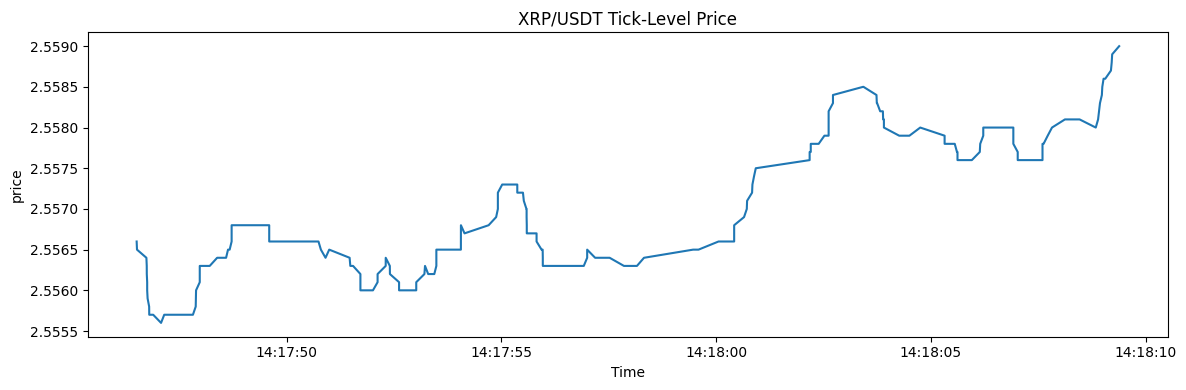

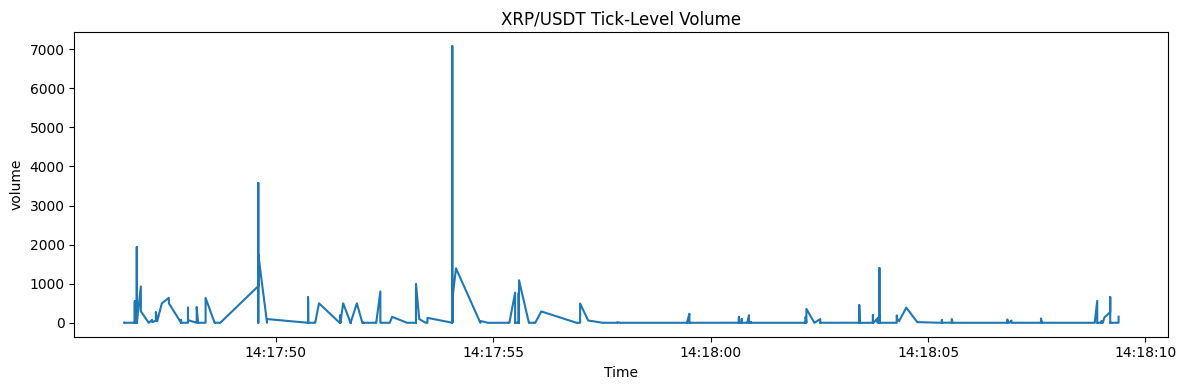

In [4]:
plot_time_series(df, 'price', title='XRP/USDT Tick-Level Price')
plot_time_series(df, 'volume', title='XRP/USDT Tick-Level Volume')

## 4. Resampling to Uniform Bars
Aggregate tick data into 100ms OHLCV bars.

In [5]:
bars = resample_tick_data(df, freq='100ms')
bars.head()

,open,high,low,close,volume
timestamp,,,,,
2025-05-14 14:17:46.500,2.5566,2.5566,2.5565,2.5565,32.2
2025-05-14 14:17:46.700,2.5564,2.5564,2.5559,2.5559,881.1
2025-05-14 14:17:46.800,2.5558,2.5558,2.5557,2.5557,7215.0
2025-05-14 14:17:47.000,2.5556,2.5556,2.5556,2.5556,3.6
2025-05-14 14:17:47.100,2.5557,2.5557,2.5557,2.5557,98.9


## 5. Visualize Resampled Data
Plot the resampled close price and volume series.

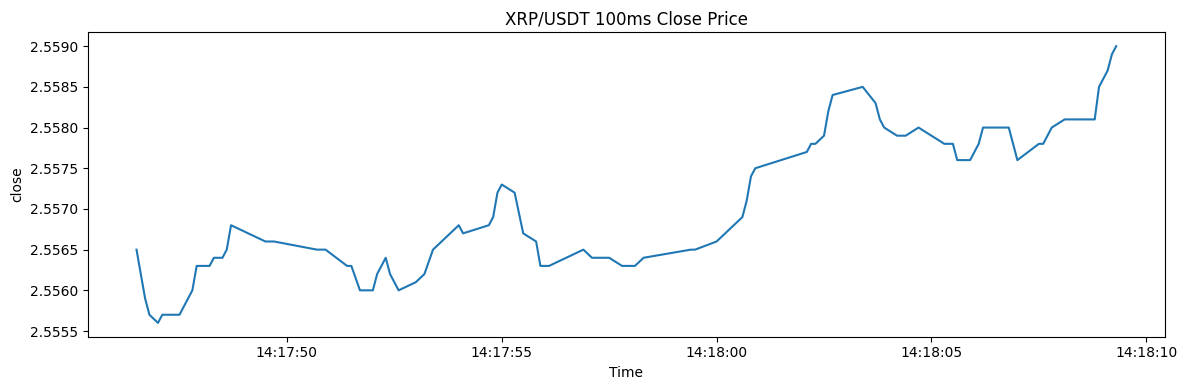

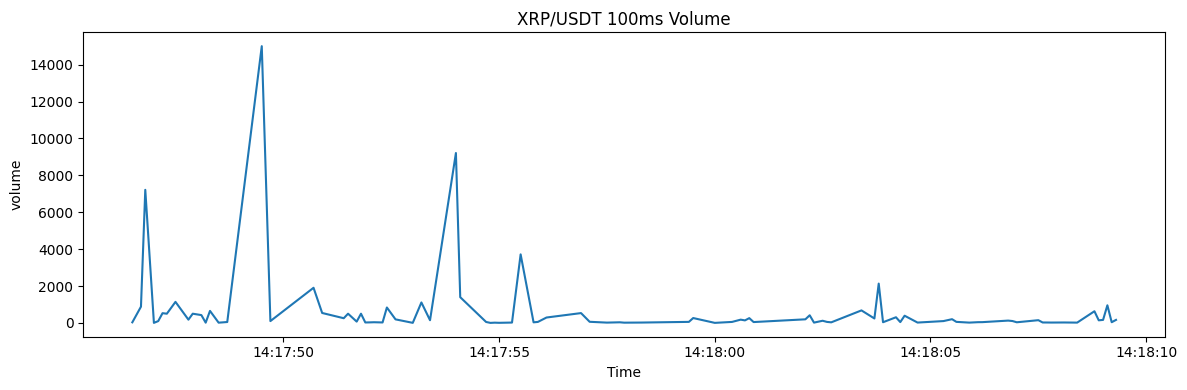

In [6]:
plot_time_series(bars, 'close', title='XRP/USDT 100ms Close Price')
plot_time_series(bars, 'volume', title='XRP/USDT 100ms Volume')

## 6. Distribution of Returns
Calculate 100ms returns and visualize their distribution.

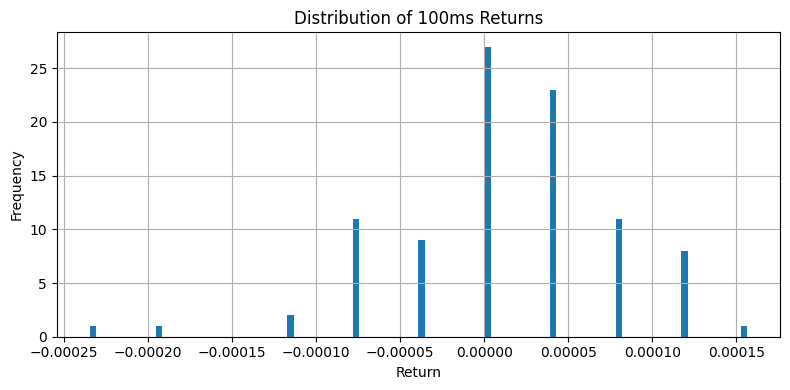

In [7]:
import matplotlib.pyplot as plt

bars['return'] = bars['close'].pct_change().fillna(0)
plt.figure(figsize=(8, 4))
bars['return'].hist(bins=100)
plt.title('Distribution of 100ms Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Next:** In `02_fft_feature_extraction.ipynb`, we will extract frequency-domain features from these bars using FFT.